Loading Covid-19 case data

Choose a region to run the model

(Thus far I have outputed only Bavaria (Germany), Lombardy (Italy) and Wuhan (China) Excel for running the model

(With the addition of data warehouse in the vacquishcovid19 project, can run with different regions with updated numbers)

In [1]:
import git
repo = git.Repo('.', search_parent_directories=True)
repo_loc = repo.working_tree_dir

import os
import sys
from pathlib import Path

sys.path.append(repo_loc)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn
# import requests
# from bs4 import BeautifulSoup
# import pickle

# Import custom functions
# from covid19_prob_func import severe_prob_update, icu_or_vent_prob_update, update_prob, death_num_update
from src.covid19_plot_func import plot_death_icu_rate
from src.covid19_model import run_model, run_multiple
from src import conf_helper as cf
from src.covid19_region_attr import create_region

# Set parameters

In [2]:
model_config_file = 'model_param_v1.yaml'
model_config = cf.CovidConf(project_dir=repo_loc, config_file=model_config_file)

In [3]:
list_region_config = ['bavaria_20200416.yaml', 'lombardy_20200417.yaml', 'nsw_20200425.yaml', 'wuhan_20200412.yaml']

df_d_icu_rate = pd.DataFrame()
t_hosp_bed = 2000 # Assuming there is enough number of beds

# Run model

In [4]:
list_region_obj = []

for config_file in list_region_config:

    r = create_region(config_file)
    
    list_region_obj.append(r)
    print('Running model with region: ', r.region_name)
    temp_icu_rate = []

    n_days = len(r.daily_case) + 50

    t_icu = r.t_icu_ade

    t_icu_portion = np.arange(0.0, 1.01, 0.01)
    # t_icu_portion = ""

    if t_icu_portion is None:
        t_icu = [t_icu]
    else:
        t_icu = (np.array(t_icu_portion)*t_icu).round()
        

    t_vent = (np.array(t_icu)*0.6).round() # Initial number of ventilators
    list_df_infected, list_df_death_cause = run_multiple(r.daily_case, r.pop_ratio, n_days, t_hosp_bed, t_icu, t_vent, model_config)

    for i in range(len(list_df_death_cause)):
        temp_icu_rate.append(list_df_death_cause[i]['Total'].sum().sum()/r.get_total_case()*100)

    df_d_icu_rate[r.region_name] = temp_icu_rate

Running model with region:  Bavaria
t_icu:  0.0
Running model for Day 0...
Running model for Day 10...
Running model for Day 20...
Running model for Day 30...
Running model for Day 40...
Running model for Day 50...
Running model for Day 60...
Running model for Day 70...
Running model for Day 80...
Running model for Day 90...
Running model for Day 100...
Finished running model for t_icu value of 0

t_icu:  31.0
Running model for Day 0...
Running model for Day 10...
Running model for Day 20...
Running model for Day 30...
Running model for Day 40...
Running model for Day 50...
Running model for Day 60...
Running model for Day 70...
Running model for Day 80...
Running model for Day 90...
Running model for Day 100...
Finished running model for t_icu value of 31

t_icu:  63.0
Running model for Day 0...
Running model for Day 10...
Running model for Day 20...
Running model for Day 30...
Running model for Day 40...
Running model for Day 50...
Running model for Day 60...
Running model for Day 70

# Plotting

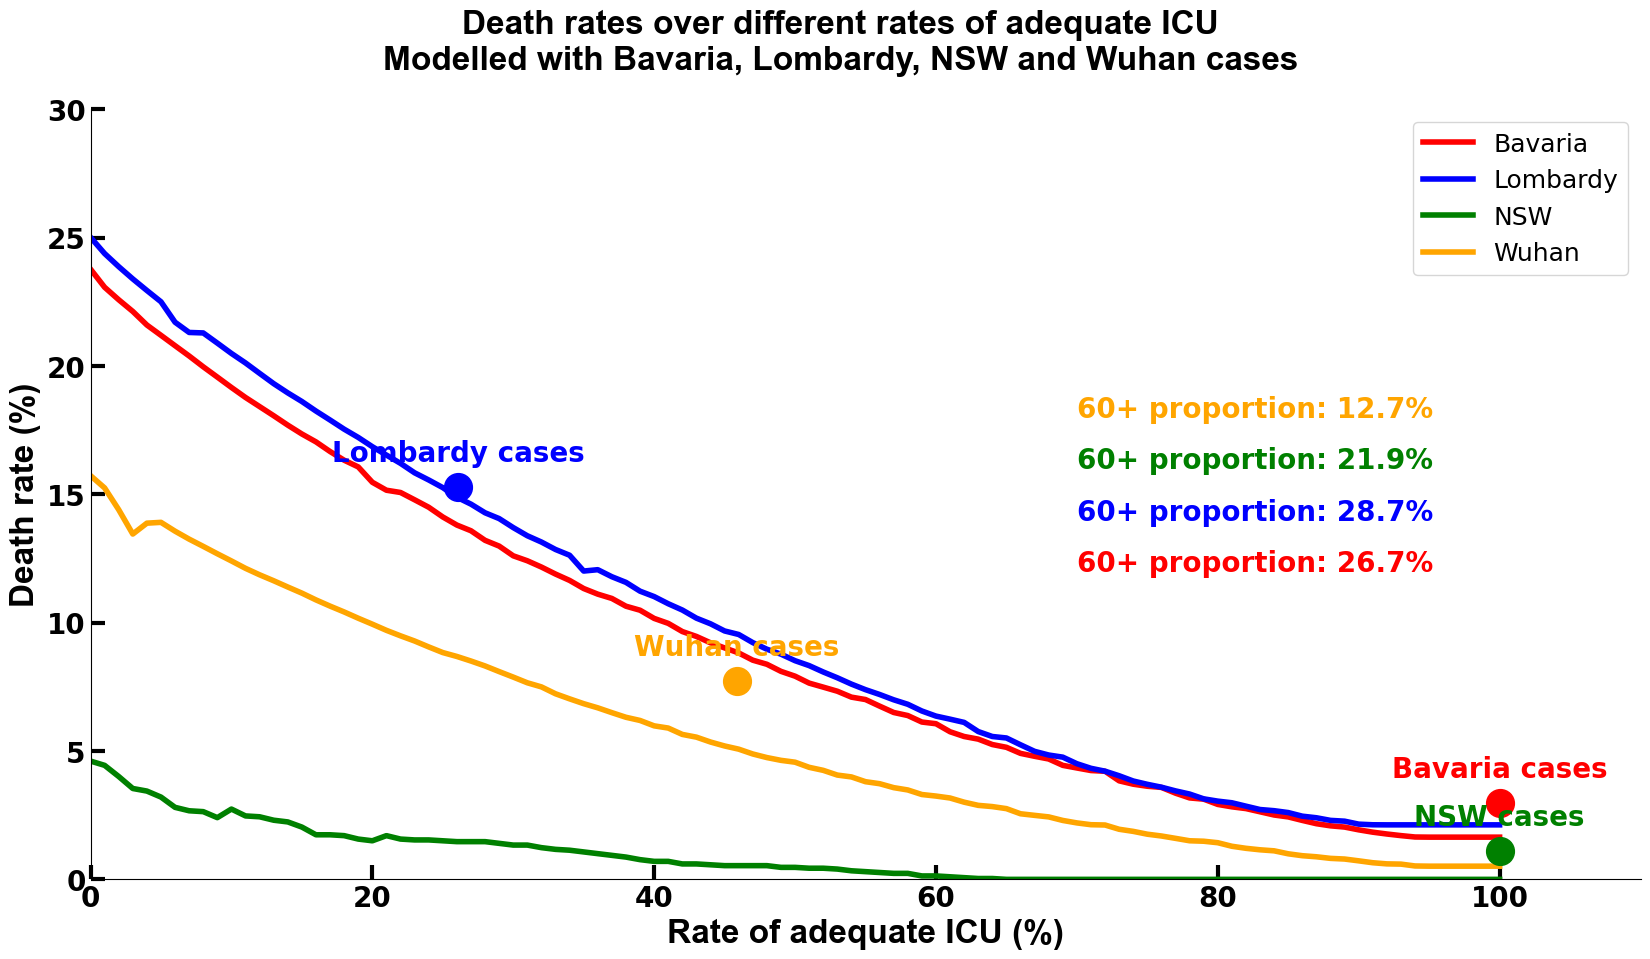

In [5]:
ax = plot_death_icu_rate(df_d_icu_rate, list_region_obj)